In [6]:
import pandas as pd

df = pd.read_excel('/home/ilia/PycharmProjects/rbd_hw/data2.xls')
df
#Пісял прочитання файлу ми можемо одразу відмітити три пусті колонки, навіть без назви, і можемо їх одразу викинути, тому що ніякої цінності вони нам не представляють

,sepal_length,sepal_width,petal_length,petal_width,species,,,.
0,5.93,3.66,4.94,2.69,Iris-versicolor,NaN,NaN,NaN
1,6.89,3.79,6.16,2.81,Iris-virginica,NaN,NaN,NaN
2,6.70,3.64,5.99,2.81,Iris-virginica,NaN,NaN,NaN
3,6.74,2.68,4.71,2.29,Iris-versicolor,NaN,NaN,NaN
4,5.96,4.16,2.99,1.56,Iris-setosa,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2419,6.96,3.76,2.73,0.65,Iris-setosa,NaN,NaN,NaN
2420,7.43,4.14,6.11,3.00,Iris-virginica,NaN,NaN,NaN
2421,6.54,4.56,1.69,0.87,Iris-setosa,NaN,NaN,NaN
2422,7.11,4.66,5.3,3.80,Iris-virginica,NaN,NaN,NaN


In [14]:
df.info()
#З методу інфо ми дізнаємось індекси колонок для того щоб їх дропнути, бо назви колонок пропущені
#І також звідси ми дізнались що колонки sepal_width та petal_length вказані в строчному форматі, з яким нам буде не комфортно працювати
# Тому ми ці колонки повинні привести до числового формату, але перед цим треба впевнитись що в них не присутнє сміття, а саме НЕ ЧИСЛА, а якісь букви

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  2394 non-null   float64
 1   sepal_width   2393 non-null   object 
 2   petal_length  2393 non-null   object 
 3   petal_width   2393 non-null   float64
 4   species       2424 non-null   object 
 5                 0 non-null      float64
 6                 0 non-null      float64
 7   .             0 non-null      float64
dtypes: float64(5), object(3)
memory usage: 151.6+ KB


In [15]:
# Дропаємо пусті колонки та тепер працюємо з cutted_df датасетом
cutted_df = df.drop(df.columns[[5, 6, 7]],axis = 1)
cutted_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.93,3.66,4.94,2.69,Iris-versicolor
1,6.89,3.79,6.16,2.81,Iris-virginica
2,6.70,3.64,5.99,2.81,Iris-virginica
3,6.74,2.68,4.71,2.29,Iris-versicolor
4,5.96,4.16,2.99,1.56,Iris-setosa
...,...,...,...,...,...
2419,6.96,3.76,2.73,0.65,Iris-setosa
2420,7.43,4.14,6.11,3.00,Iris-virginica
2421,6.54,4.56,1.69,0.87,Iris-setosa
2422,7.11,4.66,5.3,3.80,Iris-virginica


In [16]:
cutted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  2394 non-null   float64
 1   sepal_width   2393 non-null   object 
 2   petal_length  2393 non-null   object 
 3   petal_width   2393 non-null   float64
 4   species       2424 non-null   object 
dtypes: float64(2), object(3)
memory usage: 94.8+ KB


In [39]:
#Тепер приведемо колонки до цифрового типу, але спочатку ми повинні впевнетись що колонки мають тільки числа. 

def get_non_numeric_records(column_name, data_frame) :
    pattern = r'^[^\d]*$'
    return data_frame[data_frame[column_name].str.contains(pattern, regex=True, na=False)]

filtered_sepal_width = get_non_numeric_records('sepal_width', cutted_df)
# Що і потрібно було довести)) Зробимо тепер теж саме для petal_length про всяк випадок та замінимо ці значення на Nan


In [40]:
filtered_petal_length = get_non_numeric_records('petal_length', cutted_df)
filtered_petal_length

,sepal_length,sepal_width,petal_length,petal_width,species


In [34]:
#Замінимо сміття колонці sepal_width на Nan та перевіримо що все спрацювало
for i in filtered_sepal_width.index:
    cutted_df.loc[i, 'sepal_width'] = float('NaN')
get_non_numeric_records('sepal_width', cutted_df)
# Можемо побачити що метод повернув пустий датафрейм, значить все спрацювало

,sepal_length,sepal_width,petal_length,petal_width,species


In [41]:
#Замінимо сміття колонці petal_length на Nan та перевіримо що все спрацювало
for i in filtered_petal_length.index:
    cutted_df.loc[i, 'petal_length'] = float('NaN')
get_non_numeric_records('petal_length', cutted_df)
# Можемо побачити що метод повернув пустий датафрейм, значить все спрацювало

,sepal_length,sepal_width,petal_length,petal_width,species


In [50]:
#Тепер можемо приводити наші колонки до числового формату та перевірити, що все гуд

cutted_df['sepal_width'] = pd.to_numeric(cutted_df['sepal_width'], downcast='float', errors='raise')
cutted_df['petal_length'] = pd.to_numeric(cutted_df['petal_length'], downcast='float', errors='raise')
cutted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  2394 non-null   float64
 1   sepal_width   2391 non-null   float32
 2   petal_length  2392 non-null   float32
 3   petal_width   2393 non-null   float64
 4   species       2424 non-null   object 
dtypes: float32(2), float64(2), object(1)
memory usage: 75.9+ KB


In [56]:
#Бачимо що зараз з типами колонок все в нормі. Тепер зробимо дескрайб
cutted_df.describe()
#Тут можно прослідкувати аномально великі значення в метриці max. А також є від'ємні значення. В попередньому датасеті також були від'ємні значення, але я їх залишив.
#В цьому датасеті я хочу спробувати для експерименту викинути від'ємні значення, тому що в контексті данного датасету це нереально. Довжини і ширини не можуть бути від'ємними
# А ось стосовно максимального значення 70 треба прослідкувати де і як воно зустрічається і на скільки часто щоб прийняти рішення, що х ним робити

,sepal_length,sepal_width,petal_length,petal_width
count,2394.000000,2391.000000,2392.00000,2393.000000
mean,6.469511,3.978155,4.62674,2.215061
std,2.540472,1.716951,2.41223,1.755113
min,-10.000000,0.000000,0.00000,0.000000
25%,5.930000,3.445000,2.74000,1.450000
50%,6.700000,4.000000,5.09000,2.220000
75%,7.490000,4.580000,6.15000,2.940000
max,70.000000,70.000000,70.00000,70.000000


In [65]:
#Давайте отримаємо всі записи які мають в тій чи іншій колонці значення більше або дорівнює 10 наприклад( тому що середнє значення усюди загалом не перевалює за 7 та в квантилях є значення 7 и більше тому зробимо запас)


cutted_df[(cutted_df['sepal_length'] >= 10) | (cutted_df['sepal_width'] >= 10) | (cutted_df['petal_length'] >= 10) | (cutted_df['petal_width'] >= 10)]

#Можемо побачити, що є записи де всі довжини однакові, що є аномально на базі метрик аналізу всього датасету, цих записів дуже не багато, в порівнянні з розміром датасету, тому ми можемо їх викинути, а саме це записи 1122, 1317, 2317. Можна було б написати запит, що верне саме ці рекорди, але їх три штуки тому я дропну ці записи за айдішками

,sepal_length,sepal_width,petal_length,petal_width,species
1122,70.00,70.00,70.00,70.0,Iris-setosa
1317,10.00,10.00,10.00,10.0,Iris-virginica
1571,10.49,5.07,9.04,2.7,Iris-virginica
2317,10.00,10.00,10.00,10.0,Iris-setosa


In [67]:
# Дропнемо аномальні записи та перевіримо що їх нема
cutted_df = cutted_df.drop([1122, 1317, 2317])

cutted_df = cutted_df.reset_index(drop=True)
cutted_df[(cutted_df['sepal_length'] >= 10) | (cutted_df['sepal_width'] >= 10) | (cutted_df['petal_length'] >= 10) | (cutted_df['petal_width'] >= 10)]


,sepal_length,sepal_width,petal_length,petal_width,species
1569,10.49,5.07,9.04,2.7,Iris-virginica


In [68]:
# Проведемо ті ж самі маніпуляції, але вже з від'ємними значеннями

cutted_df[(cutted_df['sepal_length'] <= 0) | (cutted_df['sepal_width'] <= 0) | (cutted_df['petal_length'] <= 0) | (cutted_df['petal_width'] <= 0)]

#БАчимо два випадки, перший де колонка sepal_length має від'ємні значення, а інши колонки в записі нормальні. Та інший випадок, де у нас є записи де у всіх колонках нулі.
# В першому випадку, від'ємні значення в колонці sepal_length ми можемо замінити на середнє. А другому випадку нульові записи повністю викинути, бо вони для нас не мають жодної цінності

,sepal_length,sepal_width,petal_length,petal_width,species
14,0.00,0.00,0.00,0.00,Iris-versicolor
20,-9.45,4.47,5.46,2.83,Iris-versicolor
128,0.00,0.00,0.00,0.00,Iris-versicolor
135,0.00,0.00,0.00,0.00,Iris-setosa
166,0.00,0.00,0.00,0.00,Iris-setosa
...,...,...,...,...,...
2317,0.00,0.00,0.00,0.00,Iris-versicolor
2322,0.00,0.00,0.00,0.00,Iris-virginica
2341,0.00,0.00,0.00,0.00,Iris-setosa
2360,0.00,0.00,0.00,0.00,Iris-setosa


In [70]:
# Викинемо нульові записи

zero_records = cutted_df[(cutted_df['sepal_length'] == 0) & (cutted_df['sepal_width'] == 0) & (cutted_df['petal_length'] == 0) & (cutted_df['petal_width'] == 0)]

cutted_df = cutted_df.drop(zero_records.index)

cutted_df = cutted_df.reset_index(drop=True)

cutted_df[(cutted_df['sepal_length'] <= 0) | (cutted_df['sepal_width'] <= 0) | (cutted_df['petal_length'] <= 0) | (cutted_df['petal_width'] <= 0)]
#Залишились тільки записи з від'ємною sepal_length

,sepal_length,sepal_width,petal_length,petal_width,species
19,-9.45,4.47,5.46,2.83,Iris-versicolor
324,-10.00,2.70,4.90,1.80,Iris-virginica
476,-8.42,3.84,6.06,2.96,Iris-virginica
525,-9.55,4.61,2.27,1.25,Iris-setosa
587,-10.00,3.40,1.40,0.20,Iris-setosa
618,-9.01,4.25,5.52,2.75,Iris-virginica
729,-9.99,3.23,4.90,1.90,Iris-versicolor
757,-9.68,3.86,5.16,3.20,Iris-versicolor
902,-9.21,3.62,5.29,2.00,Iris-virginica
955,-9.25,3.71,4.50,2.19,Iris-versicolor


In [73]:
#Отримуємо середні значення для колонки sepal_length
sepal_length_mean_value=cutted_df['sepal_length'].mean()
negative_sepal_lengths = cutted_df[cutted_df['sepal_length'] <0]

#Заповнюємо їх середнім значенням та перевіряємо що в датасеті не лишилось від'ємних значень
cutted_df.loc[negative_sepal_lengths.index, 'sepal_length'] = sepal_length_mean_value
cutted_df[(cutted_df['sepal_length'] < 0) | (cutted_df['sepal_width'] <0) | (cutted_df['petal_length'] < 0) | (cutted_df['petal_width'] < 0)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [94]:
# Тепер з останніх аномальних даних які в нас лишились і нам потрібно бути запроцесити це пропуски та 0 в колонках, що також будемо ввжати за пропуски
# Їх вже будемо заповнювати за умовою задачі, в інтервалі з 0-1000 середніми, 1000-2000 ffill, 2000 та інші bfill. Тут можливо будуть дублюватись шматочки коду з фалу hw5_data1, але з деякими нюансами.

#Отримуємо індекси рядків де у нас присутні пропуски
df_0_1000 = cutted_df[0:1001]

gapped_sepal_length = df_0_1000[(df_0_1000['sepal_length'].isna())]
gapped_sepal_width = df_0_1000[(df_0_1000['sepal_width'].isna())]
gapped_petal_length = df_0_1000[(df_0_1000['petal_length'].isna())]
gapped_petal_width = df_0_1000[(df_0_1000['petal_width'].isna())]

    #Отримуємо середні значення для кожної колонки по всьому датасету
sepal_length_mean_value=cutted_df['sepal_length'].mean()
sepal_width_mean_value=cutted_df['sepal_width'].mean() 
petal_length_mean_value=cutted_df['petal_length'].mean() 
petal_width_mean_value=cutted_df['petal_width'].mean() 

#По отриманим індексам пропусків заповнюємо їх отриманими середніми значенями
cutted_df.loc[gapped_sepal_length.index, 'sepal_length'] = sepal_length_mean_value
cutted_df.loc[gapped_sepal_width.index, 'sepal_width'] = sepal_width_mean_value
cutted_df.loc[gapped_petal_length.index, 'petal_length'] = petal_length_mean_value
cutted_df.loc[gapped_petal_width.index, 'petal_width'] = petal_width_mean_value

#Перевіряємо що в діапазоні від 0 до 1000 не має пропусків та 0
cutted_df[0:1001][cutted_df[0:1001].isnull().any(axis=1)].__len__() == 0



True

In [99]:
#Заповнюємо пропуски  з 1001 елемента і до 2000 методом ffill
cutted_df[1001:2001].ffill(inplace=True)

#Перевіряємо що в діапазоні від 1001 до 2000 не має пропусків
cutted_df[1001:2001][cutted_df[1001:2001].isnull().any(axis=1)].__len__() == 0

/tmp/ipykernel_41531/714756125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutted_df[1001:2001].ffill(inplace=True)


True

In [100]:
#Заповнюємо пропуски  з 2001 елемента і до кінця методом bfill
cutted_df[2001:].bfill(inplace=True)

#Перевіряємо що в діапазоні від 2001 до кінця не має пропусків
cutted_df[2001:][cutted_df[2001:].isnull().any(axis=1)].__len__() == 0

/tmp/ipykernel_41531/1042870077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutted_df[2001:].bfill(inplace=True)


True

In [102]:
#Заповнимо нульові значення в колонках середніми 

zero_sepal_length = cutted_df[(cutted_df['sepal_length'] == 0)]
zero_sepal_width = cutted_df[(cutted_df['sepal_width'] == 0)]
zero_petal_length = cutted_df[(cutted_df['petal_length'] == 0)]
zero_petal_width = cutted_df[(cutted_df['petal_width'] == 0)]

#По отриманим індексам заповнюємо їх отриманими середніми значенями
cutted_df.loc[zero_sepal_length.index, 'sepal_length'] = sepal_length_mean_value
cutted_df.loc[zero_sepal_width.index, 'sepal_width'] = sepal_width_mean_value
cutted_df.loc[zero_petal_length.index, 'petal_length'] = petal_length_mean_value
cutted_df.loc[zero_petal_width.index, 'petal_width'] = petal_width_mean_value

In [103]:
#Тепер за описом можно прослідкувати чистенькі дані без аномалій, без екстра великих, екстра маленьких, нульвоих та негативних значень
cutted_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2348.000000,2348.000000,2348.000000,2348.000000
mean,6.801786,4.071647,4.744664,2.251613
std,1.033450,0.787001,1.852684,0.992184
min,4.300000,2.000000,1.000000,0.100000
25%,6.060000,3.510000,2.920000,1.517500
50%,6.750000,4.030000,5.120000,2.265000
75%,7.520000,4.590000,6.180000,2.960000
max,10.490000,7.470000,9.040000,5.440000


In [104]:
#Тепер побудуємо лінійну регресію. Скопіюємо ії реалізацію з попереднього завдання
#В завданні не було вказано для якого саме ірису зробити передбачення petal_width, тому я обрав Iris-setosa
X = cutted_df[cutted_df.species == 'Iris-setosa'].drop(labels=['petal_width', 'species'], axis = 1)
Y = cutted_df[cutted_df.species == 'Iris-setosa']['petal_width']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [105]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X_train, Y_train)

LinearRegression()

In [106]:
linear_regression.predict(X_test)

array([1.5010071 , 1.66964523, 1.84735599, 0.78723233, 0.64896013,
       1.46915563, 1.41372938, 1.88130156, 1.24181449, 2.29749908,
       2.35069185, 0.97957659, 0.84428734, 1.55941371, 1.45797909,
       2.45486688, 1.15847938, 1.05526864, 1.02666143, 1.63932525,
       0.72563336, 1.3051033 , 1.95065576, 0.60420909, 1.50118939,
       0.74253679, 1.06905415, 1.51493289, 1.58968127, 1.01834033,
       1.2738607 , 1.88130156, 2.19327408, 1.33221625, 0.70208856,
       1.3205691 , 1.89626986, 1.5133481 , 1.40156449, 1.60109639,
       1.62618794, 1.75987721, 1.35331721, 1.028152  , 0.63694316,
       1.69895042, 1.16258891, 1.21636564, 1.23407271, 0.67500729,
       1.63030059, 1.70781741, 1.34673978, 1.48730908, 0.45930431,
       1.24195912, 0.94392904, 2.28320982, 1.21241643, 0.83363376,
       0.68182897, 1.59702428, 1.37284919, 1.00315473, 1.87001981,
       1.53522538, 1.15769304, 2.35135628, 0.88255921, 3.15757911,
       1.07197815, 0.80908243, 1.55782358, 1.82997131, 1.04436

In [107]:
Y_test
#В цьому випвдку вже прослідковується більш цікавий результат. І якщо з попереднього разу ми мали великі похибки майже у кожному значення. То тут вже результат кращий, але причина похибок лишилась все такая ж сама. Це можно прослідкуват по графіку нижче

2343    0.65
2290    1.84
137     1.90
1485    1.19
1685    0.20
        ... 
552     1.44
555     2.25
25      0.20
2320    0.74
1169    0.83
Name: petal_width, Length: 230, dtype: float64

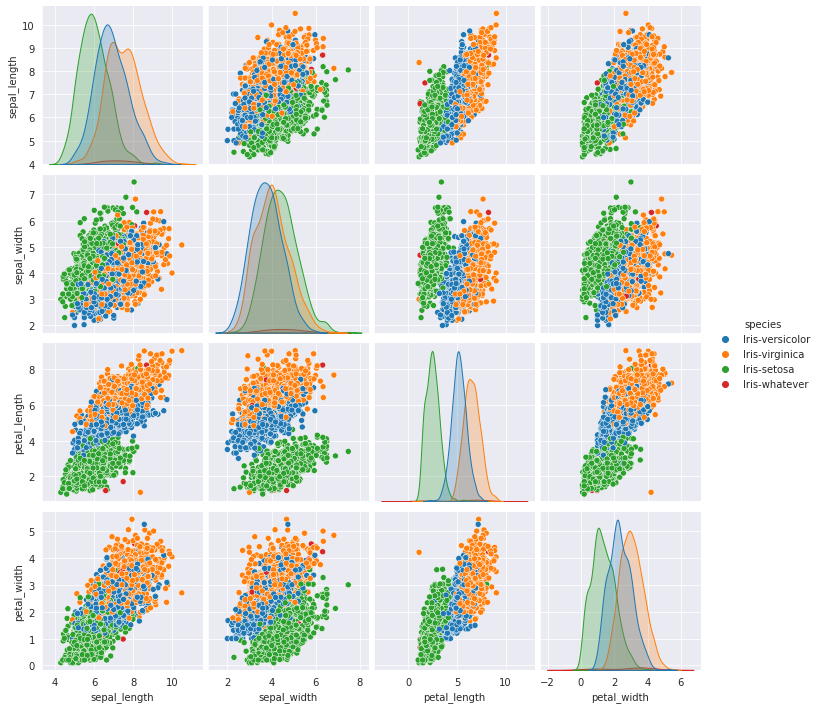

In [108]:
import seaborn as sns


sns.pairplot(cutted_df, hue='species')
#На графіку можна побачити, що для іриса сетоси при збільшенні petal_width не сильно збільшується інші параметри.  Тому мені здається, що лінійну регресію в данному випадку не є доречним використовувати, так як предікшн вийшов неточний, і на графіку візуально ми не можемо провести лінію збільшення одного та іншого прямопропорційно

In [110]:
#Спробуємо реалізувати ще предікшн для Iris-versicolor, чисто для експерименту
X_versicolor = cutted_df[cutted_df.species == 'Iris-versicolor'].drop(labels=['petal_width', 'species'], axis = 1)
Y_versicolor = cutted_df[cutted_df.species == 'Iris-versicolor']['petal_width']

X_train_versicolor, X_test_versicolor, Y_train_versicolor, Y_test_versicolor = train_test_split(X_versicolor, Y_versicolor, test_size=0.3, random_state=101)

linear_regression = LinearRegression()

linear_regression.fit(X_train_versicolor, Y_train_versicolor)

LinearRegression()

In [111]:
linear_regression.predict(X_test_versicolor)

array([2.42672152, 2.49160221, 1.5011556 , 1.60201498, 1.49562333,
       2.59833591, 2.16551567, 1.68011521, 2.59164674, 2.50233327,
       2.08446508, 2.32340219, 2.318413  , 3.20721347, 2.42531483,
       2.62991188, 2.92663957, 2.61584351, 3.0656747 , 2.09077129,
       2.15299446, 2.48143702, 2.51941359, 3.03244027, 1.97827605,
       2.3776229 , 2.13889987, 2.46902149, 2.43894967, 2.86522239,
       1.77832252, 2.11243256, 1.85980125, 2.59310149, 2.15737645,
       1.78210096, 3.03828103, 1.73895919, 1.72609915, 1.78705947,
       2.54842657, 1.56701744, 2.1968385 , 1.63188296, 2.07760863,
       3.28892561, 3.3092672 , 2.63537141, 1.49457422, 2.94763904,
       2.4772213 , 2.4004863 , 2.47971507, 2.63414885, 3.46443351,
       1.345916  , 1.99093295, 2.17487329, 2.38969844, 1.52932933,
       2.90446673, 2.72287111, 3.25045843, 2.58467965, 2.41227886,
       2.29346017, 2.86038725, 2.94354743, 2.62887253, 2.49309778,
       1.61518286, 2.82799815, 1.66409163, 2.79876659, 2.51238

In [112]:
Y_test_versicolor
# І в принципі бачимо +- ідентичний результат

2235    2.71
404     2.87
126     1.94
311     2.24
2012    2.00
        ... 
900     2.37
214     1.48
1574    2.97
2319    2.28
1162    3.62
Name: petal_width, Length: 235, dtype: float64